# Arboles de Desición
* Es propenso a sobreajustarse
* Si se sobreajusta hay dos maneras de solucionarlos es limitar el crecimiento del arbol o podarlo
* Sirve para REGRESION O CLASIFICACION

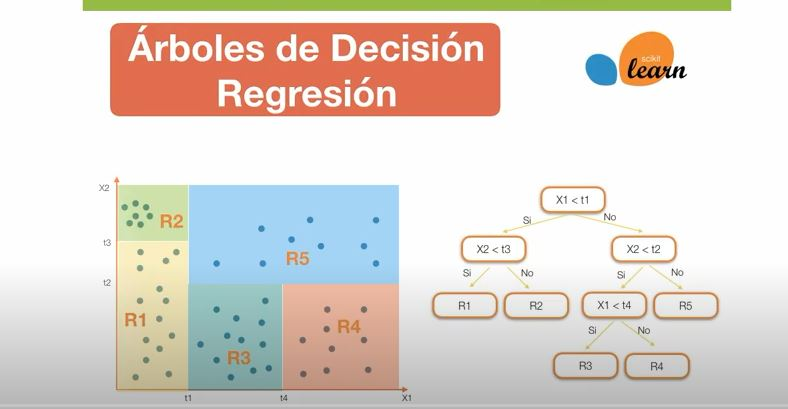

In [1]:
#Importando librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
#IMPORTANDO LOS DATOS
casas = pd.read_csv("train.csv", sep=",")
casas.head()

NameError: name 'pd' is not defined

In [3]:
#Explorando datos
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

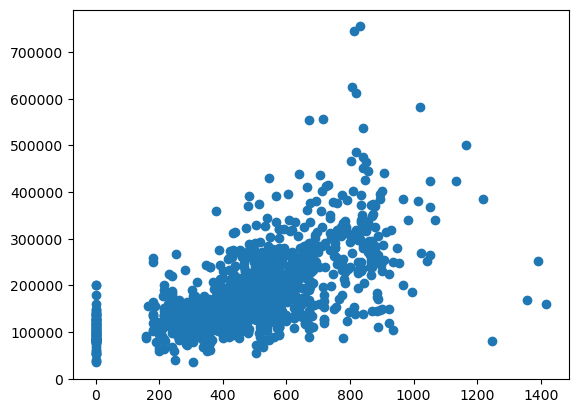

In [4]:
plt.scatter(casas["GarageArea"], casas["SalePrice"])

## Separando Datos de prueba y entrenamiento

In [146]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(casas["GarageArea"], casas["SalePrice"],test_size=0.3)

#PARA ESTA FUNCION X SE PASA EN 2D Y "Y" EN 1D
x_train = np.array(x_train)
x_test = np.array(x_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

## Definiendo el Algoritmo a usar

In [163]:
from  sklearn.tree import DecisionTreeRegressor

#Instancio el algoritmo
adr = DecisionTreeRegressor(max_depth=5) #Ramas del arbol. Las particiones las hace en potencia de 2
#Es decir que para dos particiones realmente me hace 4

In [164]:
## Entrenando el modelo
adr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

## Realizando una prediccion

In [165]:
y_predict = adr.predict(x_test)

## Recolectando los datos en un DataFrame

In [166]:
type(x_test)
a_test = x_test.flatten()
a_test
datosgraf_test = pd.DataFrame({"x_test":a_test, "y_test":y_test, "y_predict": y_predict})

In [180]:
datosgraf_test = datosgraf_test.sort_values("x_test")

## Graficando Datos

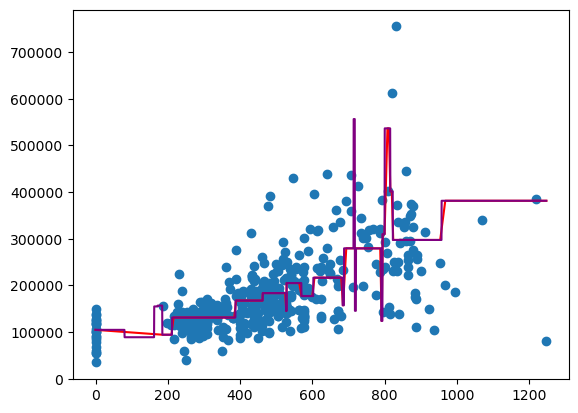

In [186]:
plt.scatter(x_test, y_test)
plt.plot(datosgraf_test["x_test"], datosgraf_test["y_predict"], color="red")

#Graficando la curva de prediccion
x_arbol = np.arange(0,x_test.max(),0.5)
x_arbol = x_arbol.reshape(-1,1)
plt.plot(x_arbol, adr.predict(x_arbol), color="purple")

## Precision del Modelo

In [188]:
adr.score(x_train, y_train)

0.562865820835809

## Conclusiones
* Para cada intervalo de valores "x" se da un valor unico como prediccion "y"
* La cantidad de intervalos se definen en el modelo de forma potencial al cuadrado

In [172]:
adr.predict(np.array([[0],[0],[640],[900]]))

array([104813.55932203, 104813.55932203, 216634.57777778, 297474.52083333])